
محاضرة 5 - ملف 14- training the model





# طريقة أهرى للتدريب

#df_train=df.copy()

print(df_train.isnull().sum())


#X_train = df_train.values
#X_train






df_full_train = pd.concat([df_train, df_val])

y_full_train = np.concatenate([y_train, y_val])

df_full_train = df_full_train.reset_index(drop=True)




w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
w0, w












<br>
<br>
<br>
<h1 style="	  direction: rtl;">
1. فهم وتحليل البيانات (Processing the Data)
</h1>



<h4 style="	  direction: rtl;">
تحميل البيانات واستعراضها: استخدم خطوات من ملف Data Preparation لتحميل البيانات والتحقق من محتواها:
</h4>


In [9]:
import pandas as pd

df = pd.read_csv('D:/Jupyter_projects/data.csv')
df.head()




,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
df.dtypes


datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object



<h4 style="	  direction: rtl;">
عرض للقيم الفريدة و غير الفريدة بحيث يمكننا معرفة الحقول الفئوية و الحقول التي تحتاج لتحويلها و تحضيرها 
</h4>

In [11]:
for col in df.columns:
    print(col)
    # print only the first 5 values
    # print(df[col].unique()[:5])
    print(df[col].unique())
    print("number of unique values: ",df[col].nunique())
    print()

datetime
['2011-01-01 00:00:00' '2011-01-01 01:00:00' '2011-01-01 02:00:00' ...
 '2012-12-19 21:00:00' '2012-12-19 22:00:00' '2012-12-19 23:00:00']
number of unique values:  10886

season
[1 2 3 4]
number of unique values:  4

holiday
[0 1]
number of unique values:  2

workingday
[0 1]
number of unique values:  2

weather
[1 2 3 4]
number of unique values:  4

temp
[ 9.84  9.02  8.2  13.12 15.58 14.76 17.22 18.86 18.04 16.4  13.94 12.3
 10.66  6.56  5.74  7.38  4.92 11.48  4.1   3.28  2.46 21.32 22.96 23.78
 24.6  19.68 22.14 20.5  27.06 26.24 25.42 27.88 28.7  30.34 31.16 29.52
 33.62 35.26 36.9  32.8  31.98 34.44 36.08 37.72 38.54  1.64  0.82 39.36
 41.  ]
number of unique values:  49

atemp
[14.395 13.635 12.88  17.425 19.695 16.665 21.21  22.725 21.97  20.455
 11.365 10.605  9.85   8.335  6.82   5.305  6.06   9.09  12.12   7.575
 15.91   3.03   3.79   4.545 15.15  18.18  25.    26.515 27.275 29.545
 23.485 25.76  31.06  30.305 24.24  18.94  31.82  32.575 33.335 28.79
 34.85  35.605

In [12]:
# لعرض الحقول الفئوية فقط
# df.dtypes[df.dtypes == 'object']

# تم استحدام ال index ليتم استدعاء الحقول التي تمثل الحقول  object و اضافة عليها الحقل الافتراضي index  
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings


['datetime']

<Axes: xlabel='count', ylabel='Count'>

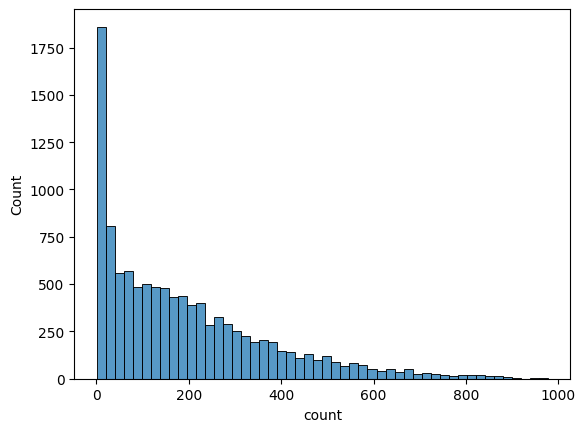

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
 

sns.histplot(df['count'], bins=50)


<Axes: xlabel='count', ylabel='Count'>

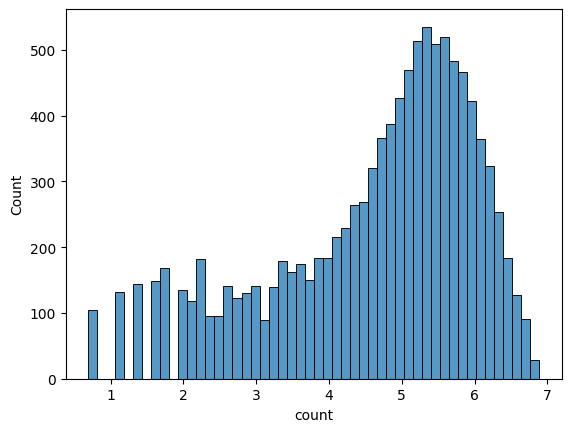

In [14]:
import numpy as np

price_logs = np.log1p(df['count'])
sns.histplot(price_logs, bins=50)


# Preparation and Cleaning Data



 
<h4 style="	  direction: rtl;">
 تنظيف البيانات: إذا كانت هناك قيم مفقودة أو متكررة، تعامل معها باستخدام الأساليب التي تم شرحها في ملف Data Preparation.
</h4>


In [15]:

df.columns
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


<h4 style="	  direction: rtl;">
 نلاحظ انه لا يوجد قيم مفقودة او مكررة او بها مشاكل و لكن اذا كان هناك ذلك فهناك بعض الطرق التي يمكن التعامل معها و هي :
<br>
<br>
 ملاحطة // الكود التالي أكثر من المطلوب في السؤال و ذلك  لتوظيف جميل الحلول الممكنة للتعامل مع البيانات المتكررة و المفقودة

</h4>





<h4 style="	  direction: rtl;">
1- التعامل مع القيم المفقودة (Missing Values):
</h4>




In [17]:

#يمكن أن تظهر القيم المفقودة عند عدم وجود بيانات كاملة في بعض الأعمدة. هناك عدة طرق للتعامل معها:


#   1- الحذف (Dropping):


#    حذف الصفوف: إذا كانت نسبة القيم المفقودة قليلة مقارنة بحجم البيانات.

df.dropna(inplace=True)  # حذف الصفوف التي تحتوي على قيم مفقودة



# حذف الأعمدة: إذا كان العمود يحتوي على عدد كبير جدًا من القيم المفقودة.

df.dropna(axis=1, inplace=True)  # حذف الأعمدة التي تحتوي على قيم مفقودة





# 2- الاستبدال (Imputation):

#    استبدال بالقيم المتوسطة أو الشائعة: للأعمدة العددية.

df['column_name'].fillna(df['column_name'].mean(), inplace=True)  # ملء القيم المفقودة بالمتوسط



# استبدال بالقيم الأكثر تكرارًا: للأعمدة النصية أو التصنيفية.

df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)



# استبدال بقيمة ثابتة: مثل 0 أو "غير معروف" بناءً على طبيعة البيانات.
df['column_name'].fillna(0, inplace=True)

KeyError: 'column_name'




<h4 style="	  direction: rtl;">
2-  التعامل مع القيم المتكررة (Duplicates):

</h4>




In [19]:

# وجود بيانات مكررة قد يؤدي إلى تحيز في النتائج.


#  1- اكتشاف القيم المتكررة:

duplicates = df.duplicated()  # اكتشاف الصفوف المكررة

print()

# تحقق مما إذا كان هناك على الأقل صف مكرر واحد.
print(df.duplicated().any() )

print()

# طباعة قيمة الحقل مكرر اذا كان موجود
df.loc[df.duplicated()]




False



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [6]:

#  2- حذف القيم المتكررة:

#     حذف الصفوف المكررة مع الاحتفاظ بأول ظهور.

df.drop_duplicates(inplace=True)

<br>
<br>

<h2 style="	  direction: rtl;">
2. تحليل البيانات الاستكشافي (EDA)
</h2>









<h4 style="	  direction: rtl;">

تحليل المتغير المستهدف: استعرض توزيع القيم في العمود المستهدف (عدد تأجير الدراجات)، واستفد من ملف Exploratory Data Analysis لتحديد الأنماط.


</h4>




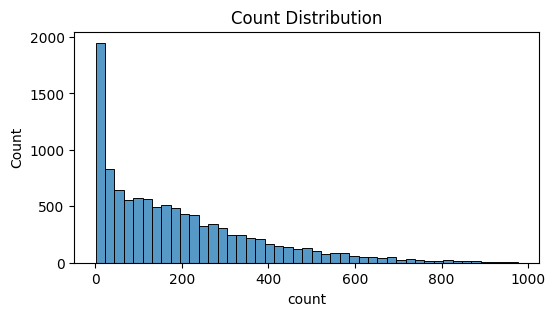

In [ ]:



# مراااااااااااااااجعة





























import matplotlib.pyplot as plt  # For plotting 1 - المكتبة الأولى للرسم
import seaborn as sns            # For plotting 2 - المكتبة الثانية للرسم
plt.figure(figsize=(6,3))
plt.title('Count Distribution')
sns.histplot(df['count'])
plt.show()


Text(0, 0.5, 'Count')

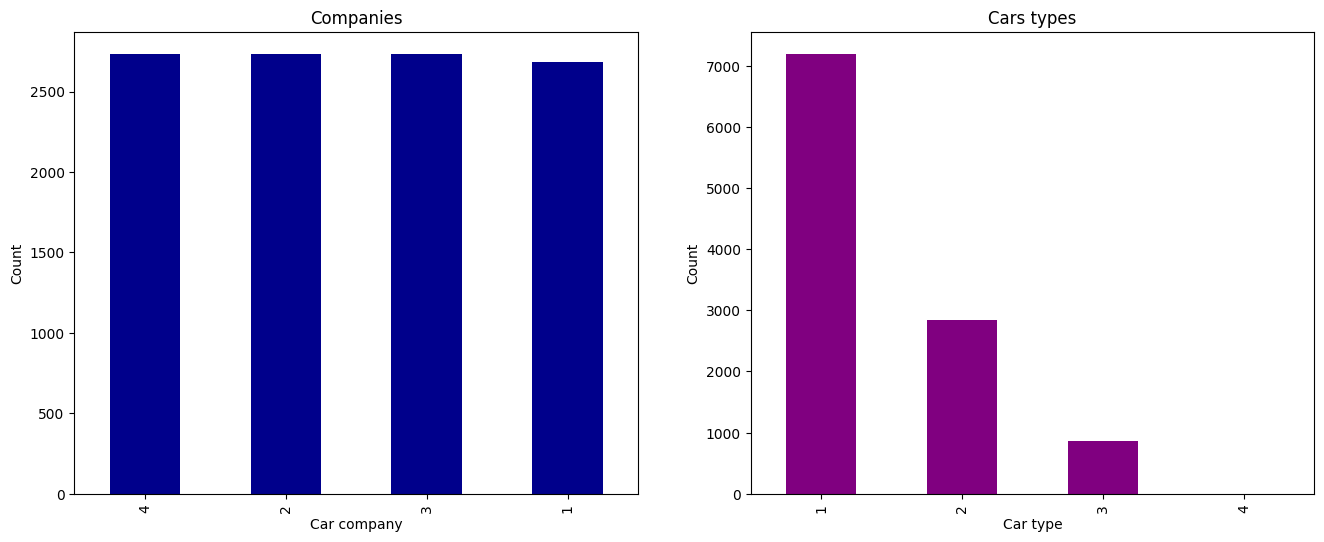

In [39]:


# مراااااااااااااااجعة























plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
df['season'].value_counts().plot(kind  = 'bar', color = 'darkblue')
plt.title('Companies')
plt.xlabel('Car company')
plt.ylabel('Count')
plt.subplot(1,2,2)



df['weather'].value_counts().plot(kind = 'bar', color = 'purple')
plt.title('Cars types')
plt.xlabel('Car type')
plt.ylabel('Count')


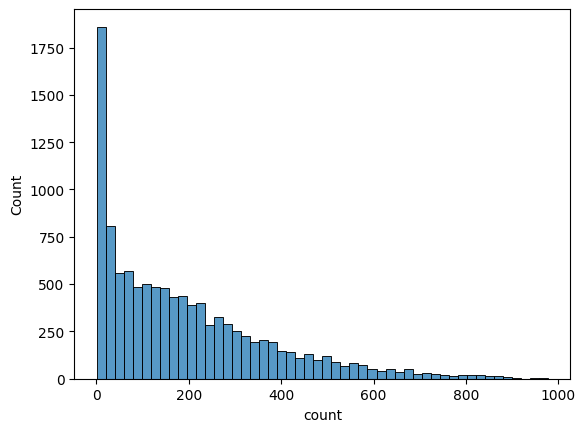

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['count'], bins=50)
plt.show()




<h4 style="	  direction: rtl;">
يوجد long-tail distribution لذلك نحتاج لعمل تحويل لوغاريتمي لتمثيله بطريقة واضحة اكثر

</h4>




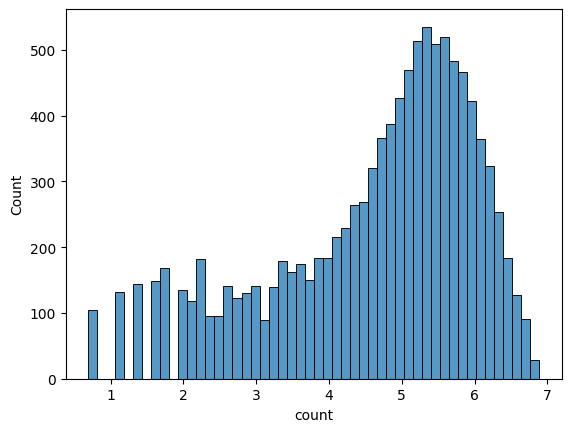

In [8]:
import numpy as np

sns.histplot(np.log1p(df['count']), bins=50)
plt.show()





<h4 style="	  direction: rtl;">
فحص العلاقات بين المتغيرات: استعراض العلاقة بين المتغيرات المستقلة والمستهدفة باستخدام الرسوم البيانية.

</h4>





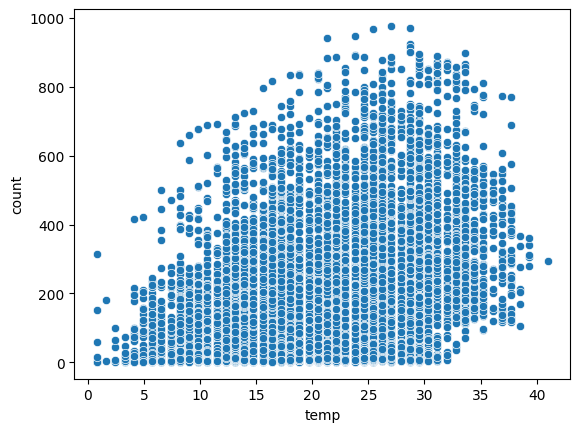

In [9]:
sns.scatterplot(data=df, x='temp', y='count')
plt.show()


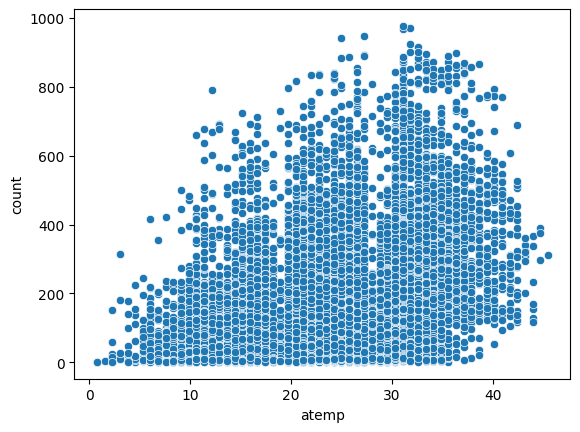

In [10]:
sns.scatterplot(data=df, x='atemp', y='count')
plt.show()


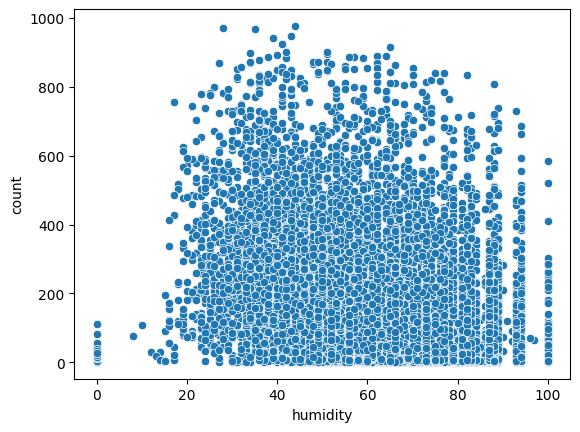

In [11]:
sns.scatterplot(data=df, x='humidity', y='count')
plt.show()


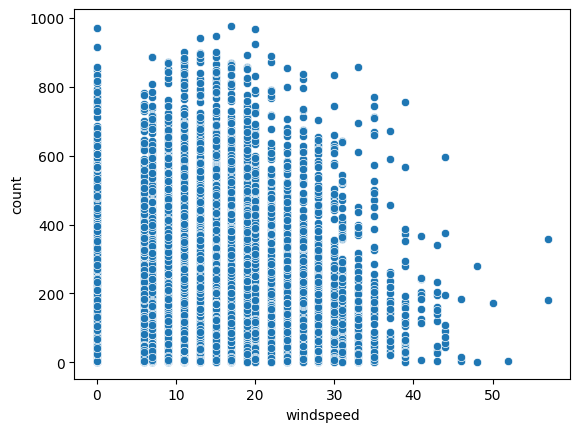

In [12]:
sns.scatterplot(data=df, x='windspeed', y='count')
plt.show()


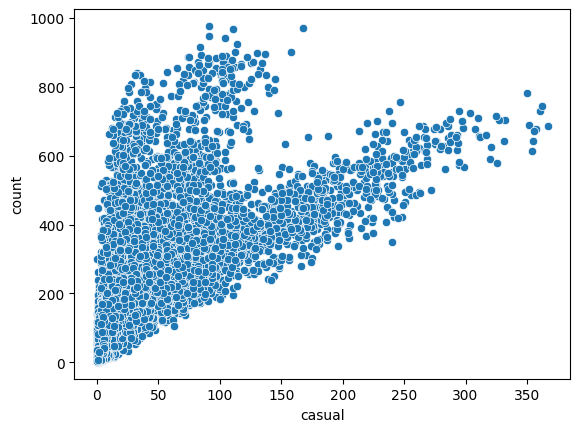

In [13]:
sns.scatterplot(data=df, x='casual', y='count')
plt.show()


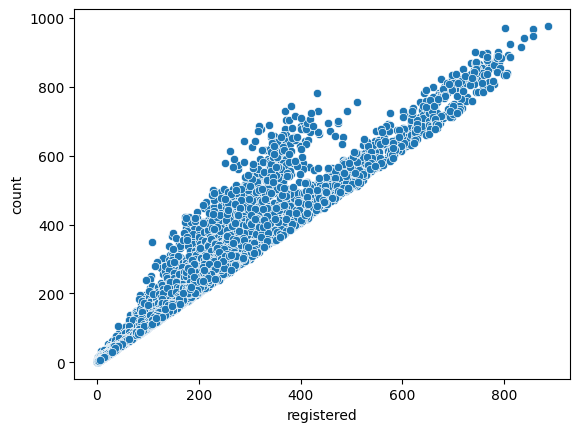

In [14]:
sns.scatterplot(data=df, x='registered', y='count')
plt.show()




<h4 style="	  direction: rtl;">
يتم استخدام barplot عند التعامل مع حقول فئات تصنيفية (Categorical)
</h4>

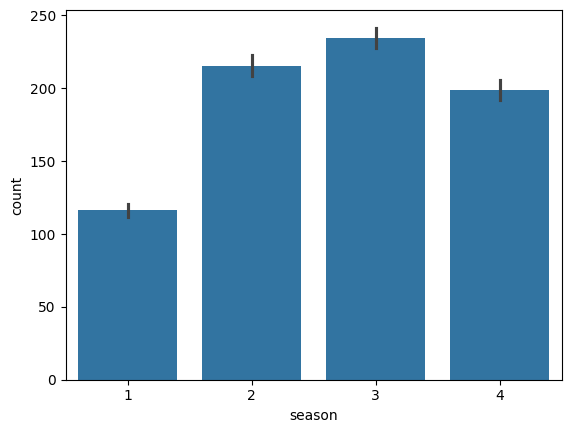

In [20]:
sns.barplot(data=df, x='season', y='count')
plt.show()


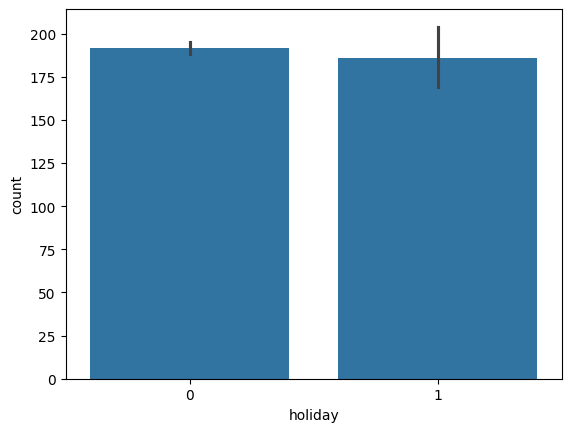

In [16]:
sns.barplot(data=df, x='holiday', y='count')
plt.show()


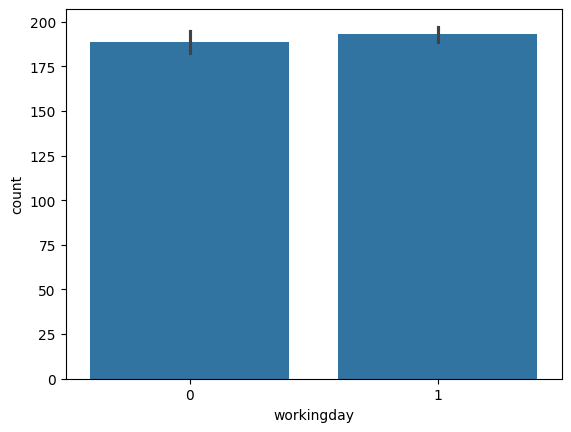

In [17]:
sns.barplot(data=df, x='workingday', y='count')
plt.show()


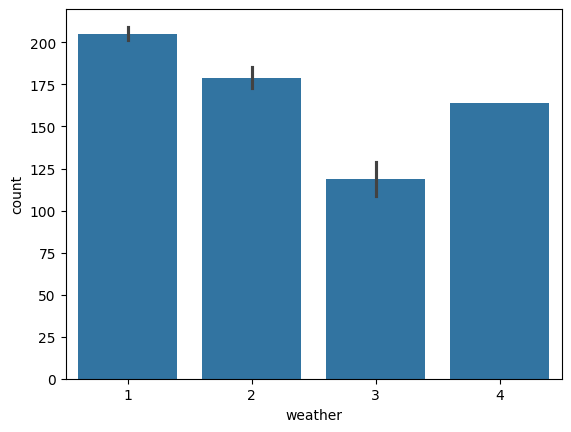

In [32]:
sns.barplot(data=df, x='weather', y='count')
plt.show()







<h4 style="	  direction: rtl;">
تحليل الارتباط: استفد من تقنية Heatmap لتحديد العلاقات القوية بين المتغيرات.

</h4>






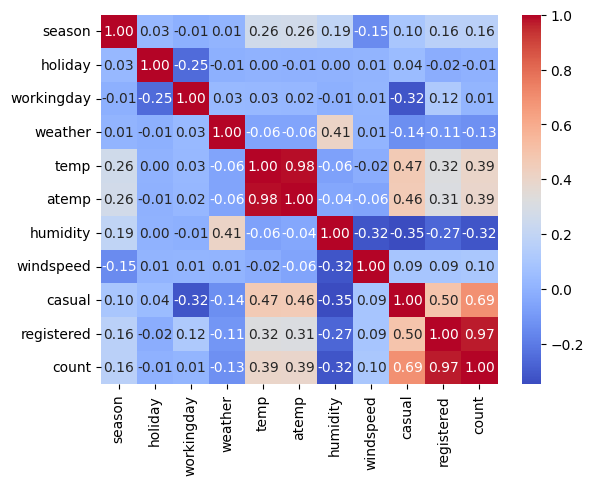

In [21]:
# يتم اختيار الأعمد الرقمية للتعامل معها فقط حيث يستثني عامود datetime

df_numeric = df.select_dtypes(include=['number'])  # تحديد الأعمدة العددية فقط

sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


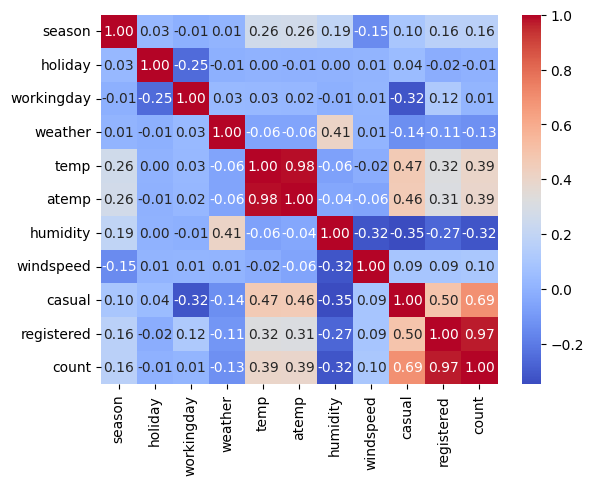

In [19]:
# طريقة أخرى يمكن عملها بدل السطر السابق مع ضم حقل التاريخ 

# تحويل عمود التاريخ إلى datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# تحديد الأعمدة العددية فقط
df_numeric = df.select_dtypes(include=['number'])


sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()


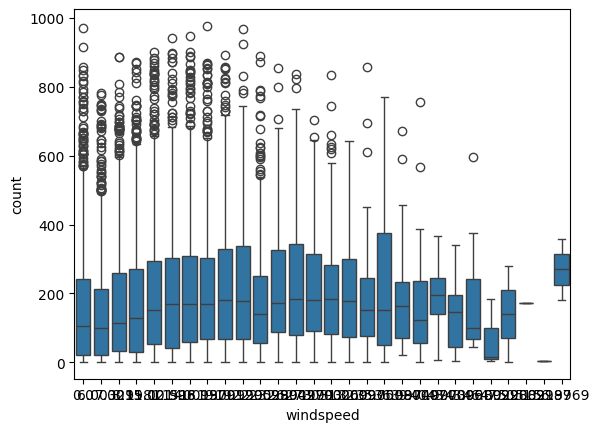

In [20]:
# تستخدام Boxplot للكشف عن القيم الشاذة:

sns.boxplot(data=df, x='windspeed', y='count')
plt.show()



# تم ملاحظة قيم شاذة في عامود windspeed و هي القيم التي قيمتها صفر حيث ان قيم العامود windspeedيحب ات تكون عدد عشري أكبر من صفر 

# يمكن اتخاذ قرار بإزالتها أو التعامل معها بشكل مختلف


<br>
<br>

<h2 style="	  direction: rtl;">
3- هندسة الميزات (Feature Engineering):


</h2>




# Encoding




<h4 style="	  direction: rtl;">
ملاحظة //  تم عمل Encoding لبعض الداتا و تحويلها من حقول فئوية الى حقول عددية مثل (season , holiday , workingday , weather) ولكن تبقى حقل datetime الذي يحتاج العمل عليه</h4>







 


<h4 style="	  direction: rtl;">
1- One-hot encoding :
تحويل القيم الفئوية إلى أعمدة منفصلة لكل فئة.

كما سيتم التعامل مع حقل datetime بهد لاحقاً

</h4>

In [ ]:
# الكود الذي يشرح العملية

# df = pd.get_dummies(df, columns=['season'], drop_first=True)






<h4 style="	  direction: rtl;">
2- Label Encoding: تحويل القيم الفئوية إلى أرقام صحيحة.

كما تم التعامل مع حقول (season , holiday , workingday , weather)

</h4>



In [ ]:
# الكود الذي يشرح العملية


# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# df['weather_encoded'] = encoder.fit_transform(df['weather'])


In [22]:
# انشاء ميزات جديدة من حقل datetime و عمل 3 حثول
# الهدف من هذا الحقل هو ملاحظة التغير في الطلب بناءً على الوقت (مثال: زيادة الطلب في عطلة نهاية الأسبوع)


df['hour'] = pd.to_datetime(df['datetime']).dt.hour
df['day_of_week'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['month'] = pd.to_datetime(df['datetime']).dt.month

df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day_of_week,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1





<h4 style="	  direction: rtl;">
انشاء حقل جديد يعبر عم درجة الحرارة المحسوسة من خلال حاصل ضرب درجة الحرارة بالرطوبة
</h4>







In [23]:
# عمل حقل جديد يمثل حاصل ضرب درجة الحرارة بسرعة الرياح ويعبر عن درجة الحرارة المحسوسة

df['temp_humidity_interaction'] = df['temp'] * df['humidity']
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day_of_week,month,temp_humidity_interaction
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,797.04
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,721.60
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,721.60
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,738.00
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,738.00





<h4 style="	  direction: rtl;">
حذف حقل Datetime لأننا قمنا بعمل Encoding له و معالجته الى قول سهلة التعامل معها في ال model

</h4>







In [24]:
df_copy = df.drop(columns=['datetime'])
df_copy.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day_of_week,month,temp_humidity_interaction
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,797.04
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,721.60
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,721.60
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,738.00
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,738.00





<h4 style="	  direction: rtl;">
التأكد من ان جميع الحقول عبارة عن حقلو عددية فقط ام لا 

</h4>







In [18]:
df_copy.dtypes


season           int64
holiday          int64
workingday       int64
weather          int64
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
hour             int32
day_of_week      int32
month            int32
dtype: object

<Axes: >

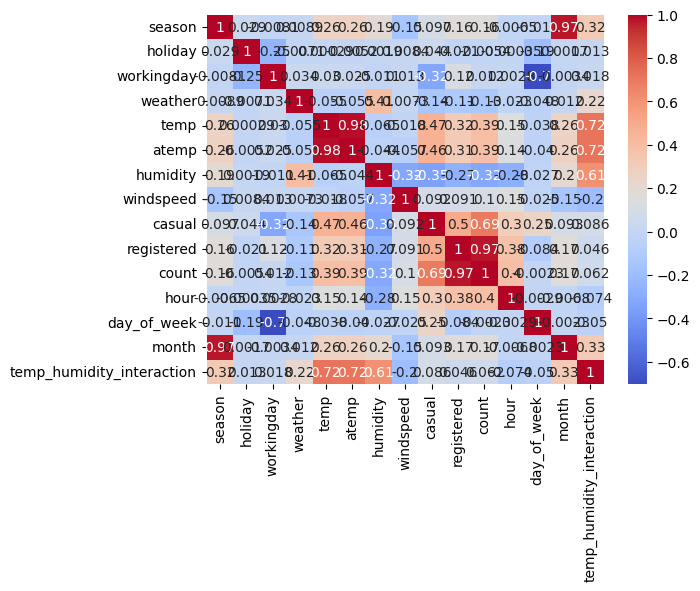

In [26]:
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')



<h2 style="	  direction: rtl;">
4- إعداد البيانات للنموذج للبدأ بالتدريب (Buildand evaluate a linear regression model) :

</h2>








<h4 style="	  direction: rtl;">
1. تقسيم البيانات إلى ميزات (Features) ومتغير مستهدف (Target)

</h4>






In [27]:
# تم اعتبار الحقل count كحقل target و باقي الحقول هي features

X = df_copy.drop(columns=['count'])  # الميزات
y = df_copy['count']  # المتغير المستهدف


2. تقسيم البيانات إلى تدريب (Training) واختبار (Testing)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تم إنشاء مجموعات:

# X_train و y_train: لتدريب النموذج.
# X_test و y_test: لتقييم النموذج.




In [44]:
# تمثل 80% من البيانات الكلية و التي سيتم استخادمها في تدريب النموذج


X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,hour,day_of_week,month,temp_humidity_interaction
2815,3,0,1,1,27.88,31.820,83,6.0032,5,30,5,2,7,2314.04
8695,3,0,0,1,36.90,40.910,39,19.9995,197,253,16,5,8,1439.10
8406,3,0,1,1,32.80,35.605,41,16.9979,56,220,15,2,7,1344.80
1543,2,0,0,2,14.76,18.180,93,7.0015,3,2,4,6,4,1372.68
4952,4,0,0,1,13.12,15.150,45,16.9979,35,165,10,5,11,590.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0,0,1,6.56,8.335,47,11.0014,6,32,2,5,1,308.32
5191,4,0,0,1,11.48,12.880,61,19.0012,15,134,9,5,12,700.28
5390,4,0,0,1,11.48,13.635,48,16.9979,27,207,16,6,12,551.04
860,1,0,0,1,15.58,19.695,17,35.0008,6,16,7,5,2,264.86


In [45]:
# تمثل 20% من البيانات الكلية و التي سيتم من خلالها اختبار الانموذج بعد تدريبه

X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,hour,day_of_week,month,temp_humidity_interaction
3133,3,0,1,1,33.62,40.150,59,0.0000,29,98,11,1,7,1983.58
5786,1,1,0,1,4.10,6.820,54,6.0032,0,13,6,0,1,221.40
5224,4,0,0,1,9.84,11.365,48,12.9980,12,151,18,6,12,472.32
8953,3,0,1,2,29.52,34.090,62,12.9980,70,163,10,2,8,1830.24
8054,2,0,1,1,25.42,31.060,53,16.9979,46,176,23,4,6,1347.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,2,0,0,3,23.78,27.275,49,19.0012,106,245,17,6,5,1165.22
5807,1,0,1,3,13.12,15.150,66,22.0028,0,2,4,1,1,865.92
10061,4,0,0,1,16.40,20.455,40,12.9980,149,360,14,6,11,656.00
5427,1,0,0,1,11.48,14.395,81,7.0015,0,5,5,6,1,929.88


In [46]:
#يعتبر ال target column و الذي يمثل حقل count 
# سيتم استخدام هذا الحقل في تدريب النموذج

y_train

2815     35
8695    450
8406    276
1543      5
4952    200
       ... 
5734     38
5191    149
5390    234
860      22
7270    358
Name: count, Length: 8708, dtype: int64

In [47]:
#يعتبر ال target column و الذي يمثل حقل count 
# سيتم استخدام هذا الحقل في إختبار النموذج

y_test

3133     127
5786      13
5224     163
8953     233
8054     222
        ... 
1963     351
5807       2
10061    509
5427       5
7588     239
Name: count, Length: 2178, dtype: int64



<h4 style="	  direction: rtl;">
3. معالجة البيانات العددية والفئوية
<br>

- التأكد من أن البيانات العددية والفئوية في صورة قابلة للنمذجة.

- التعامل مع القيم المفقودة والتحويلات الضرورية.

</h4>






In [34]:
# تنظيف البيانات المفقودة:
X_train.isnull().sum()
X_test.isnull().sum()

X_train = X_train.fillna(0)
X_test = X_test.fillna(0)



# تحويل المتغيرات الفئوية (Categorical Variables):
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)



<h4 style="	  direction: rtl;">
4. تطبيع أو تقييس الميزات (Scaling/Normalization)

جعل جميع الميزات في نفس النطاق (Scale) لتجنب التأثير غير العادل لميزات ذات نطاقات كبيرة.

</h4>






In [35]:
from sklearn.preprocessing import StandardScaler

X_train_numeric = X_train.select_dtypes(exclude=['datetime'])
X_test_numeric = X_test.select_dtypes(exclude=['datetime'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)






<h4 style="	  direction: rtl;">

5. معالجة التفاوت بين أعمدة التدريب والاختبار

التأكد من أن جميع الأعمدة في بيانات التدريب والاختبار متطابقة، خاصة بعد One-Hot Encoding.

</h4>





In [36]:
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)




<h2 style="	  direction: rtl;">
5- بناء النموذج

</h2>










<h4 style="	  direction: rtl;">
قبل البدء بتديب النموذج يجب تحديد النموذج المناسب و الذي يتطلب :

<br>

1-- تحديد المشكلة ونوع البيانات


== إذا كنت تعرف طبيعة البيانات (وجود علاقة خطية، عدد الخصائص، أو احتمال وجود تداخل خطي)، يمكنك اختيار النموذج بناءً على خصائصه:
- إذا كانت البيانات خالية من التداخل وخصائصها محدودة: Linear Regression قد يكون كافياً.
- إذا كان هناك تداخل خطي (Multicollinearity): استخدام Ridge Regression.
- إذا كنت ترغب في اختيار الخصائص الأكثر أهمية: استخدام Lasso Regression.
        
</h4>









<h4 style="	  direction: rtl;">

<br>

2-- تحليل البيانات وتقييم التداخل الخطي (Multicollinearity)
<br>

= حساب معامل الارتباط:

- التداخل الخطي يحدث عندما تكون بعض الخصائص مرتبطة ببعضها بشكل كبير.
-  يمكنك استخدام معامل الارتباط (R2R2) بين الخصائص لتحليل ذلك.

<br>

إذا كانت بعض القيم قريبة من 1 أو -1، فهذا يشير إلى وجود تداخل خطي قوي، مما يجعل Ridge خيارًا مناسبًا.
</h4>







In [37]:
import pandas as pd

# حساب مصفوفة الارتباط
correlation_matrix = pd.DataFrame(X_train).corr()

# عرض العلاقات القوية
print(correlation_matrix)


                             season   holiday  workingday   weather      temp  \
season                     1.000000  0.028788    0.000083  0.006103  0.255521   
holiday                    0.028788  1.000000   -0.253249 -0.017063 -0.005064   
workingday                 0.000083 -0.253249    1.000000  0.036027  0.027855   
weather                    0.006103 -0.017063    0.036027  1.000000 -0.056508   
temp                       0.255521 -0.005064    0.027855 -0.056508  1.000000   
atemp                      0.260658 -0.012046    0.023520 -0.057588  0.984902   
humidity                   0.192480 -0.002480   -0.005580  0.406262 -0.069600   
windspeed                 -0.144962  0.015316    0.004963  0.011795 -0.015686   
casual                     0.096623  0.043911   -0.320210 -0.134297  0.469973   
registered                 0.160954 -0.024252    0.121947 -0.112740  0.312085   
hour                      -0.012358  0.005212    0.004012 -0.025692  0.143478   
day_of_week               -0


    

<h4 style="	  direction: rtl;">

= تحليل عامل التباين التضخمي (VIF):

- VIF (Variance Inflation Factor) يقيس تأثير التداخل الخطي. كلما كان أكبر من 10، زاد التداخل.

- إذا كانت قيم VIF عالية، يُفضل استخدام Ridge أو Lasso.
        
</h4>







In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# حساب VIF لكل خاصية
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

print(vif_data)


                      feature         VIF
0                      season  108.239723
1                     holiday    1.437524
2                  workingday    8.447297
3                     weather    7.532874
4                        temp  341.541044
5                       atemp  305.735701
6                    humidity   40.027158
7                   windspeed    3.691333
8                      casual    3.535920
9                  registered    3.401281
10                       hour    4.568852
11                day_of_week    7.339347
12                      month   83.398094
13  temp_humidity_interaction   48.521219








<h4 style="	  direction: rtl;">

== تجربة النماذج وتقييم أدائها
- استخدام جميع النماذج ومقارنة أدائها: درب كل نموذج وقم بتقييمه بناءً على معايير الأداء:

الكود لتدريب النماذج وتقييمها:

</h4>







In [43]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# قائمة النماذج
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),  # alpha هو λ
    "Lasso Regression": Lasso(alpha=0.1)  # alpha هو λ
}

# تقييم كل نموذج
for name, model in models.items():
    model.fit(X_train, y_train)  # تدريب النموذج
    y_pred = model.predict(X_test)  # التوقع
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: R² = {r2:.4f}, RMSE = {rmse:.4f}")


Linear Regression: R² = 1.0000, RMSE = 0.0000
Ridge Regression: R² = 1.0000, RMSE = 0.0000
Lasso Regression: R² = 1.0000, RMSE = 0.0021





<h4 style="	  direction: rtl;">

== تحديد النموذج الأنسب

 - بناءً على النتائج:
        - إذا كانت R² عالية وRMSE منخفضة، فهذا يشير إلى أن النموذج يعمل جيدًا.
        - قارن بين النماذج لتحديد الأفضل بناءً على معايير الأداء.

مثال على النتائج:

</h4>

Linear Regression: R² = 1.0000   ,    RMSE = 0.0000

Ridge Regression:  R² = 1.0000   ,    RMSE = 0.0000

Lasso Regression:  R² = 1.0000   ,    RMSE = 0.0021


<h4 style="	  direction: rtl;">

- إذا كانت Ridge أو Lasso تعطي نتائج أفضل من Linear Regression، فهذا يعني أن التنظيم كان مفيدًا.

</h4>




<h4 style="	  direction: rtl;">

== التفسير بناءً على النتائج

  = اختيار النموذج:

     - إذا أعطى Ridge نتائج أفضل:
         - التداخل الخطي كان مشكلة في البيانات.

         - Ridge هو الأنسب لأنه يعالج هذه المشكلة دون التخلص من الخصائص.
     - إذا أعطى Lasso نتائج أفضل:
         - هناك خصائص غير مهمة تم التخلص منها.
         - Lasso هو الأنسب لأنه يقوم باختيار الخصائص.
         
     - إذا كان أداء Linear Regression كافيًا:
         - البيانات خالية من التداخل، والتنظيم غير ضروري.

</h4>










<br>

<h3 style="	  direction: rtl;">

نستنتج أن نموذج Linear Regression هو انسب نوع يمكن استخدامه لبناء نموذج من نوع  Regression

</h4>



<h3 style="	  direction: rtl;">

في الخطوات السابقة تم تدريب النموذج مع الانواع الثلاثة ل Regression ,  و لكن الأن سنقوم بإعادة التديب خطوة بخطوة لمجرد تسهيل الفهم و التعلم 

</h4>







<h4 style="	  direction: rtl;">

1. استيراد المكتبة المناسبة لنوع النموذج المستخدم

</h4>







In [22]:
from sklearn.linear_model import LinearRegression , Lasso, Ridge


from sklearn.metrics import r2_score, mean_squared_error # for evaluation - لتقييم الآداء





<h4 style="	  direction: rtl;">

2. إنشاء ألنموذج
</h4>






In [54]:
model = LinearRegression()

#model = Lasso()
# model = Ridge()



<h4 style="	  direction: rtl;">

3. تدريب النموذج (Training the Model)
</h4>





In [55]:


model.fit(X_train_scaled, y_train)


LinearRegression()



<h4 style="	  direction: rtl;">

4. استخراج الأوزان والمصطلح الثابت

عرض الأوزان التي يمثل كل منها تأثير إحدى الميزات على المتغير المستهدف.

</h4>









In [75]:
print("Coefficients:", model.coef_)
print()
print("Intercept:", model.intercept_)




Coefficients: [ 4.49589323e-14 -4.61852778e-14 -3.78800723e-14 -6.10622664e-16
  1.24344979e-14  5.32907052e-14  2.39808173e-14  1.73194792e-14
  4.98558163e+01  1.51123508e+02 -5.84532422e-14  3.26405569e-14
  7.46069873e-14  5.68434189e-14]

Intercept: 191.58474965548922




<h4 style="	  direction: rtl;">

5. توقع القيم (Predictions)

</h4>









In [63]:
y_pred = model.predict(X_test_scaled)
y_pred


array([127.,  13., 163., ..., 509.,   5., 239.], shape=(2178,))



<h4 style="	  direction: rtl;">

6. تقييم أداء النموذج

    Mean Absolute Error (MAE): متوسط الخطأ المطلق.

    Root Mean Squared Error (RMSE): الجذر التربيعي لمتوسط مربعات الخطأ.
    
    R² Score: معامل التحديد.
    
    </h4>








In [76]:
print('R2 value is', r2_score(y_test, y_pred))
print('RMSE value is', np.sqrt(mean_squared_error(y_test, y_pred)))




R2 value is 1.0
RMSE value is 2.228005452985523e-13


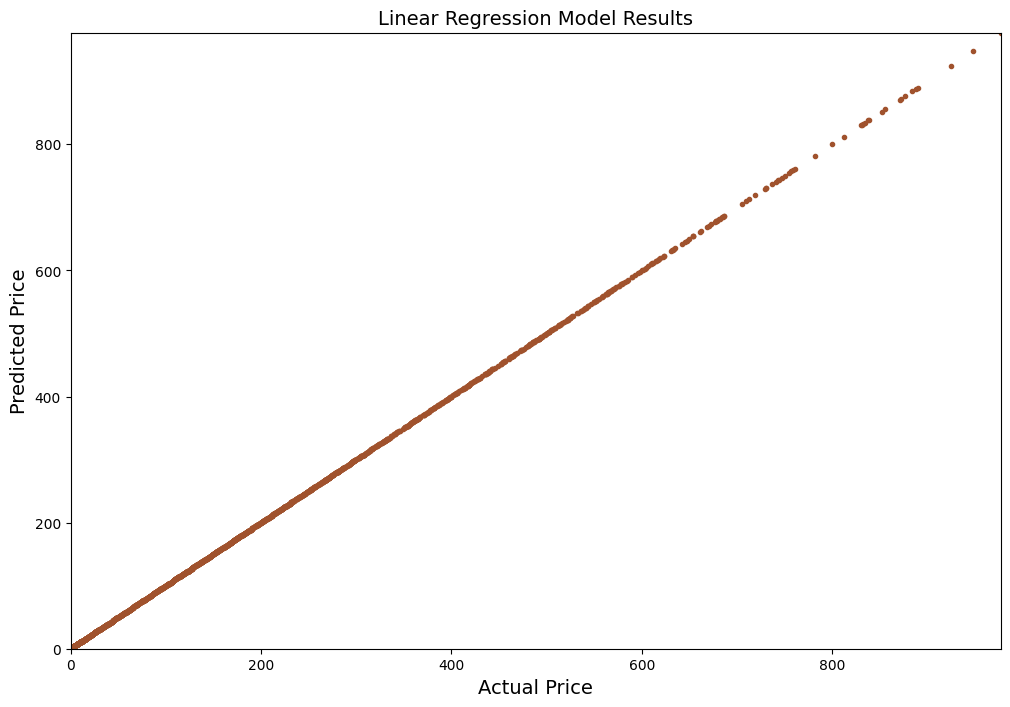

In [77]:

figure = plt.figure(figsize=(12,8))

ax = plt.axes()
ax.plot(y_test, y_pred,
         marker='o', ls='', ms=3.0,color='sienna')

lim = (0, y_test.max())

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       xlim=lim,
       ylim=lim)
plt.title('Linear Regression Model Results', fontsize=14)
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)



<Axes: xlabel='count', ylabel='Count'>

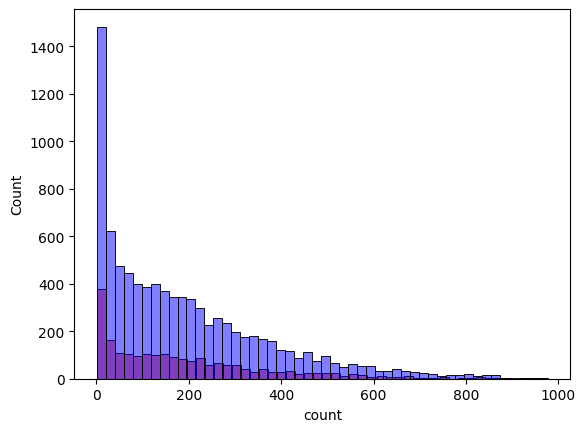

In [44]:
# alpha changes the transparency of the bars
# bins specifies the number of bars

# مقارنة بين الموديل المثالي (y_pred) و الموديل الفعلي (y_train)

sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)



<Axes: xlabel='count', ylabel='Count'>

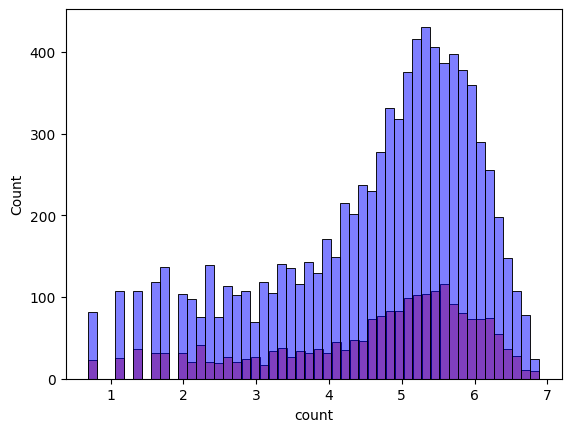

In [45]:

sns.histplot(np.log1p(y_pred), color='red', alpha=0.5, bins=50)
sns.histplot(np.log1p(y_train), color='blue', alpha=0.5, bins=50)




<h4 style="	  direction: rtl;">

7. تحليل المتبقيات (Residual Analysis)

فهم مدى ملاءمة النموذج من خلال تحليل الأخطاء (Residuals).

</h4>









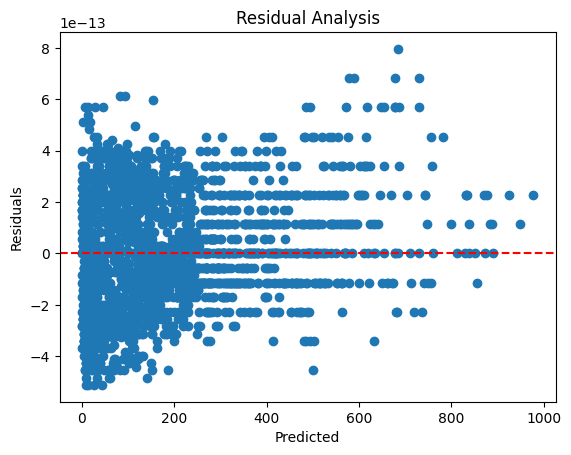

In [49]:
residuals = y_test - y_pred

import matplotlib.pyplot as plt


plt.scatter(y_pred, residuals)

plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()




<h2 style="	  direction: rtl;">

6- تحليل النتائج

</h2>














<h4 style="	  direction: rtl;">

1. استعراض مقاييس الأداء

عرض وتفسير المقاييس التي تم حسابها لتقييم أداء النموذج:

</h4>










In [78]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 2.228005452985523e-13
R² Score: 1.0






<h4 style="	  direction: rtl;">

2. تحليل المتبقيات (Residual Analysis)

    فهم ما إذا كان النموذج يلتقط الأنماط في البيانات بشكل صحيح.
    
    التحقق من توزيع الأخطاء (Residuals) لمعرفة إذا كان هناك تحيز في التوقعات.

</h4>











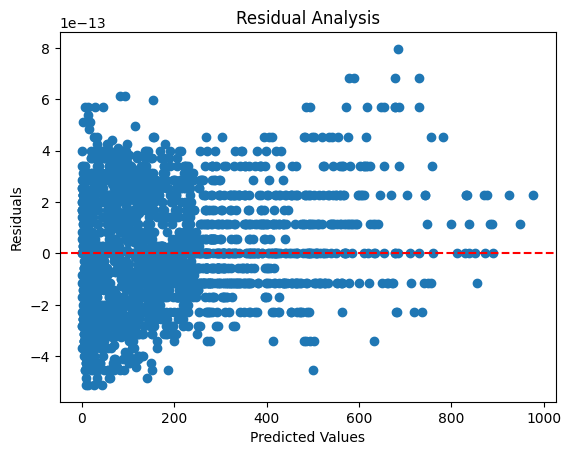

In [54]:
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()





<h4 style="	  direction: rtl;">

3. مقارنة القيم الحقيقية بالقيم المتوقعة

رؤية مدى قرب القيم المتوقعة من القيم الحقيقية.

</h4>








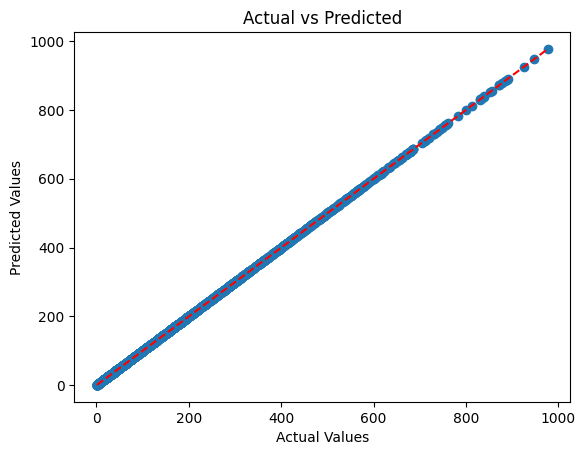

In [55]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.show()







<h4 style="	  direction: rtl;">

4. تفسير الأوزان (Feature Importance)

    فهم تأثير كل ميزة على المتغير المستهدف.

</h4>












In [56]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
print(feature_importance)


                      Feature   Coefficient
9                  registered  1.511235e+02
8                      casual  4.985582e+01
12                      month  7.460699e-14
13  temp_humidity_interaction  5.684342e-14
5                       atemp  5.329071e-14
0                      season  4.495893e-14
11                day_of_week  3.264056e-14
6                    humidity  2.398082e-14
7                   windspeed  1.731948e-14
4                        temp  1.243450e-14
3                     weather -6.106227e-16
2                  workingday -3.788007e-14
1                     holiday -4.618528e-14
10                       hour -5.845324e-14







<h4 style="	  direction: rtl;">

5. تقييم الأخطاء الشاذة (Outliers)

    اكتشاف الحالات التي أخفق فيها النموذج (أخطاء كبيرة جدًا).

</h4>





      y_test  y_pred     residuals         error
5786      13    13.0  5.684342e-13  5.684342e-13
3460      62    62.0 -4.831691e-13  4.831691e-13
3844       9     9.0 -4.831691e-13  4.831691e-13
6800     573   573.0  5.684342e-13  5.684342e-13
8490      57    57.0 -4.547474e-13  4.547474e-13
...      ...     ...           ...           ...
227      155   155.0  4.547474e-13  4.547474e-13
8710      68    68.0 -4.405365e-13  4.405365e-13
7113     481   481.0  4.547474e-13  4.547474e-13
5785       6     6.0  5.684342e-13  5.684342e-13
5452      16    16.0  5.115908e-13  5.115908e-13

[102 rows x 4 columns]


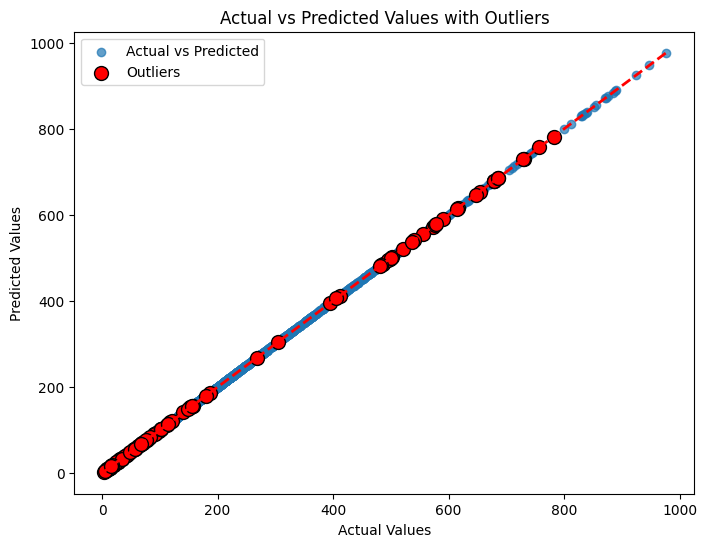

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# إنشاء DataFrame يحتوي على القيم الحقيقية (y_test) والقيم المتنبأ بها (y_pred)
results_df = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred
})

# حساب البواقي (residuals) والخطأ (error)
results_df['residuals'] = results_df['y_test'] - results_df['y_pred']
results_df['error'] = abs(results_df['residuals'])

# تحديد القيم الشاذة (outliers)
outliers = results_df[results_df['error'] > results_df['error'].quantile(0.95)]
print(outliers)



# رسم بياني لعرض القيم الحقيقية مقابل القيم المتنبأ بها
plt.figure(figsize=(8, 6))

# رسم النقاط العامة (غير الشاذة)
plt.scatter(results_df['y_test'], results_df['y_pred'], alpha=0.7, label='Actual vs Predicted')

# رسم النقاط الشاذة (outliers) باللون الأحمر
plt.scatter(outliers['y_test'], outliers['y_pred'], color='red', label='Outliers', edgecolor='black', s=100)

# إضافة خط مرجعي (خط الـ 45 درجة)
plt.plot([results_df['y_test'].min(), results_df['y_test'].max()],
         [results_df['y_test'].min(), results_df['y_test'].max()],
         color='red', linestyle='--', lw=2)  # خط الارتباط المثالي (خط الـ 45 درجة)

# إضافة التسميات والعنوان
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Outliers')
plt.legend()

# عرض الرسم البياني
plt.show()
